# **Credit EDA & Credit Score Calculation**

**Problem statement:**
To conduct a thorough exploratory data analysis (EDA) and deep analysis of a comprehensive dataset containing basic customer details and extensive credit-related information. The aim is to create new, informative features, calculate a hypothetical credit score, and uncover meaningful patterns, anomalies, and insights within the data.

In [307]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

**Downloading the data**

In [308]:
!gdown 1pljm6_3nxcFS9UMIFm124HBsjNZP6ACA

Downloading...
From: https://drive.google.com/uc?id=1pljm6_3nxcFS9UMIFm124HBsjNZP6ACA
To: /content/Credit_score.csv
100% 27.4M/27.4M [00:00<00:00, 199MB/s]


**Reading the data**

In [309]:
df= pd.read_csv('Credit_score.csv')
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133256,High_spent_Large_value_payments,479.866228
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595029,High_spent_Medium_value_payments,496.65161
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847745,High_spent_Large_value_payments,516.809083
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.6725822,Low_spent_Large_value_payments,319.164979


**Shape of the data**

In [310]:
df.shape

(100000, 27)

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

### **OBSERVATIONS**
 - There are missing values present in dataset.
 - Dataset has both numerical and string values.
 - Datatypes are not correctly assigned

In [312]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.63333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.00000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.00000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.00000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.00000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.00000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.00000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.00000


In [313]:
df.describe(exclude=np.number).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


### **OBSERVATIONS:-**
 - Customer_ID has 12500 unique values. It means we have data of 12500 customers.
 - Month has only 8 unique values. Better to analyse further which months are present.
 - Age has 1788 unique values. This looks strange as general age range is from 0-100.
 - SSN has 12501 unique values, whereas Customer_ID only has only 12500 unique values. There is a possibility that incorrect SSN value is entered for one of the customer as same person can't have multiple SSN.
 - We can see the there the most occuring SSN looks like a garabge value
 - The dataset needs data cleaning as we can see the there are underscores present in few of the columns

## **MISSING VALUES, DATA INCOSISTENCY, DATA MISMATCH & OUTLIER TREATMENT**

In [314]:
df.isna().sum()/len(df)*100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              1.200
dtype: float64

### **Column : Name**

In [315]:
df.sort_values(by=['Customer_ID', 'Month'], inplace=True)
df['Name'] = df.groupby('Customer_ID')['Name'].fillna(method='ffill').fillna(method='bfill')

**Summary**

 - There are 9985 null values.
 - Cleaning Step - Assign same Name value to each Customer_ID

### **Column : Age**

In [316]:
df['Age'].value_counts().sort_values(ascending=True).head(10)

919     1
6032    1
8698    1
6520    1
2395    1
5583    1
2182    1
1420    1
6697    1
2108    1
Name: Age, dtype: int64

In [317]:
df['Age'] = df['Age'].str.replace('_', '')
df['Age'] = df['Age'].str.replace('-', '')
df['Age'] = df['Age'].astype(int)
df['Age'] = df['Age'].where((df['Age'] >= 0) & (df['Age'] <= 120), pd.NA)
df['Age'] = df.groupby('Customer_ID')['Age'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [318]:
df['Age'] = df.groupby('Customer_ID')['Age'].transform(lambda x: x.replace(x.max(),x.mode().iloc[0]))

In [319]:
df['Age'] = df.groupby('Customer_ID')['Age'].transform(lambda x: x.replace(x.min(),x.mode().iloc[0]))

In [320]:
df['Age']=df['Age'].astype(int)

In [321]:
df['Age'].nunique()

43

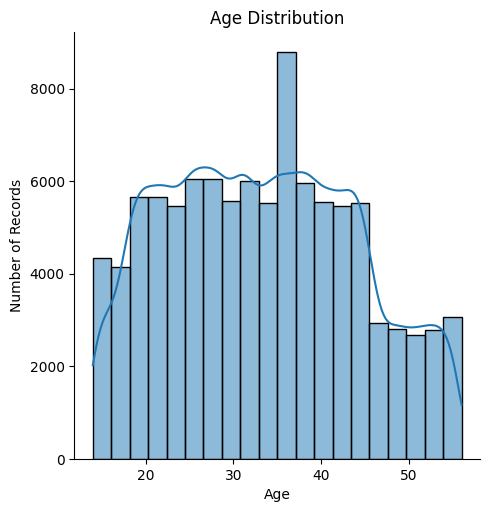

In [322]:
sns.displot(data=df, x=df['Age'], kde=True, bins=20)
plt.xlabel('Age')
plt.ylabel('Number of Records')
plt.title('Age Distribution')
plt.xticks(rotation=0)
plt.show()

**Summary**

 - There are 1788 unique values of Age and it is stored as an object.
 - Having 1788 distinct values of Age mean that there is a lot of dirty data.
 - After cleaning up Age value, 43 distinct Age remains.

### **Column : SSN**

In [323]:
df['SSN'].value_counts().sort_values(ascending=True).head(10)

604-62-6133    4
642-73-7670    4
856-06-6147    4
331-28-1921    4
286-44-9634    4
753-72-2651    4
838-33-4811    4
629-97-8199    5
070-10-9637    5
589-66-2211    5
Name: SSN, dtype: int64

In [324]:
df['SSN'] = df['SSN'].str.replace('_', '')

In [325]:
def replace_irregular_ssn(group):
  actual_ssn = group.loc[group['SSN'] != '#F%$D@*&8', 'SSN'].iloc[0]
  group_ssn = group.loc[group['SSN'] == '#F%$D@*&8', 'SSN'] = actual_ssn
  return group
df= df.groupby('Customer_ID').apply(replace_irregular_ssn).reset_index(drop=True)

In [326]:
df['SSN'].value_counts()

913-74-1218    8
523-90-6933    8
236-25-0124    8
331-24-3360    8
311-38-7874    8
              ..
360-58-3081    8
341-94-5301    8
702-76-0398    8
282-99-1365    8
832-88-8320    8
Name: SSN, Length: 12500, dtype: int64

In [327]:
df[df['SSN']=='#F%$D@*&8']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance


**Summary**
 - There are 12501 unique SSN values in the dataset.
 - 5572 entries has random/garbage value as SSN value


## **Column : Occupation**

In [328]:
df['Occupation'].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [329]:
#Using dataframe df: customer IDs with 2 kinds of occupation
df['Occupation'].str.get_dummies().sum(axis=1).value_counts()[2:]

Series([], dtype: int64)

In [330]:
def replace_underscore_occupation(group):
    mode_occupation = group['Occupation'].mode().iloc[0]
    if mode_occupation != '_______':
        group['Occupation'] = group['Occupation'].replace('_______', mode_occupation)
    else:
        non_underscore_modes = group['Occupation'][group['Occupation'] != '_______'].mode()
        if not non_underscore_modes.empty:
            non_underscore_mode = non_underscore_modes.iloc[0]
            group['Occupation'] = group['Occupation'].replace('_______', non_underscore_mode)

    return group
df= df.groupby('Customer_ID').apply(replace_underscore_occupation).reset_index(drop=True)

In [331]:
df['Occupation'].value_counts()

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Accountant       6744
Scientist        6744
Media_Manager    6720
Developer        6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

**Summary**

 - There are 16 unique Occupation values.
 - 7062 records are marked with garbage value.


## **Column: Annual_Income**

In [332]:
df['Annual_Income'] = df['Annual_Income'].str.replace('_', '')
df['Annual_Income'] = df['Annual_Income'].astype(float)

In [333]:
df['Annual_Income'].isna().sum()

0

In [334]:
df['Annual_Income'] = df.groupby('Customer_ID')['Annual_Income'].transform(lambda x: x.mode().iloc[0])

In [335]:
print(df['Annual_Income'].min(),df['Annual_Income'].max())

7005.93 179987.28


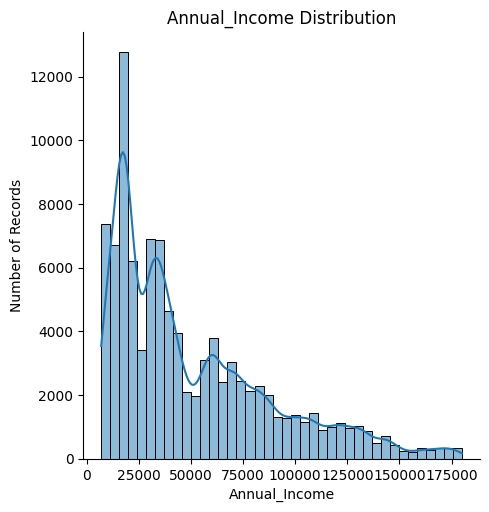

In [336]:
sns.displot(data=df, x=df['Annual_Income'], kde=True, bins=40)
plt.xlabel('Annual_Income')
plt.ylabel('Number of Records')
plt.title('Annual_Income Distribution')
plt.xticks(rotation=0)
plt.show()

**Summary**

 - Annual Income has no null values.
 - Most customers have a low Annual income.
 - Distribution is right skewed.

## **Column : Monthly_Inhand_salary**

In [337]:
nan_count_by_customer = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].apply(lambda x: x.isna().sum())
nan_count_by_customer.value_counts()

1    4862
0    3401
2    2904
3    1048
4     240
5      42
6       3
Name: Monthly_Inhand_Salary, dtype: int64

In [338]:
df.sort_values(by=['Customer_ID', 'Month'], inplace=True)
df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].fillna(method='ffill').fillna(method='bfill')

In [339]:
df['Monthly_Inhand_Salary'].isna().sum()

0

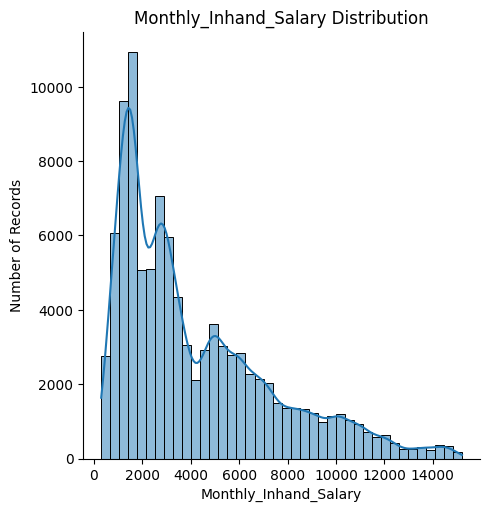

In [340]:
sns.displot(data=df, x=df['Monthly_Inhand_Salary'], kde=True, bins=40)
plt.xlabel('Monthly_Inhand_Salary')
plt.ylabel('Number of Records')
plt.title('Monthly_Inhand_Salary Distribution')
plt.xticks(rotation=0)
plt.show()

**Summary**

 - There are null values present.
 - No outliers were present for Monthly Income Salary.
 - Most customers have a low monthly income. Distribution is right skewed.

## **Column: Num_Bank_Accounts**

In [341]:
df['Num_Bank_Accounts'].value_counts()

6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
795         1
1252        1
935         1
1350        1
796         1
Name: Num_Bank_Accounts, Length: 943, dtype: int64

In [342]:
grouped_modes = df.groupby('Customer_ID')['Num_Bank_Accounts'].apply(lambda x: x.mode().iloc[0])
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].mask(df['Num_Bank_Accounts'] != df['Customer_ID'].map(grouped_modes), df['Customer_ID'].map(grouped_modes))
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x: 1 if x <= 0 else x)

In [343]:
df['Num_Bank_Accounts'].value_counts().sort_values()

2      4352
10     5328
9      5512
1      8952
3     12096
5     12272
4     12392
8     12936
7     12976
6     13184
Name: Num_Bank_Accounts, dtype: int64

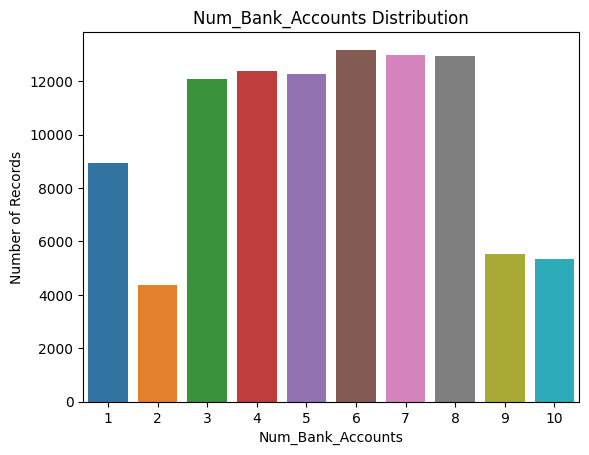

In [344]:
sns.countplot(data=df, x=df['Num_Bank_Accounts'])
plt.xlabel('Num_Bank_Accounts')
plt.ylabel('Number of Records')
plt.title('Num_Bank_Accounts Distribution')
plt.xticks(rotation=0)
plt.show()

Summary

 - There are some outliers,negative values in Num Bank Accounts
 - After cleaning, there are 11 possible value of this field
 - Num Bank Accounts ranging from 0 to 10.
 - Majority of customers has no. of bank accounts between 3 to 8.
 - For the customers having credit card and their respective Num_bank_accounts  were 0 are alloted atleast 1.  

## **Column : Num_Credit_Card**

In [345]:
df['Num_Credit_Card'].value_counts().sort_values(ascending=True)

1108        1
592         1
1198        1
1376        1
475         1
        ...  
3       13277
4       14030
6       16559
7       16615
5       18459
Name: Num_Credit_Card, Length: 1179, dtype: int64

In [346]:
grouped_modes = df.groupby('Customer_ID')['Num_Credit_Card'].apply(lambda x: x.mode().iloc[0])
df['Num_Credit_Card'] = df.apply(lambda row: grouped_modes[row['Customer_ID']] if row['Num_Credit_Card'] != grouped_modes[row['Customer_ID']] else row['Num_Credit_Card'], axis=1)

In [347]:
df['Num_Credit_Card'].value_counts().sort_values(ascending=True)

0        16
11       40
1      2184
2      2208
9      4736
10     4960
8      5096
3     13576
4     14336
6     16960
7     16984
5     18904
Name: Num_Credit_Card, dtype: int64

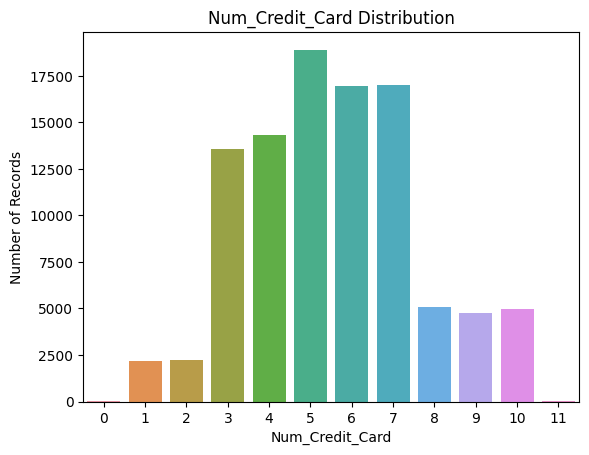

In [348]:
sns.countplot(data=df, x=df['Num_Credit_Card'])
plt.xlabel('Num_Credit_Card')
plt.ylabel('Number of Records')
plt.title('Num_Credit_Card Distribution')
plt.xticks(rotation=0)
plt.show()

**Summary**
 - There are outliers present in the field as there are 1179 unique values of number of credit card.
 - After removing outliers, number of credit cards range from 0 to 11 with most of the customers having credit cards in the range of 3 to 7 with peak at 5.

## **Column : Interest_Rate**

In [349]:
df['Interest_Rate'].value_counts().sort_values(ascending=True)

5397       1
3193       1
5279       1
524        1
464        1
        ... 
10      4540
12      4540
6       4721
5       4979
8       5012
Name: Interest_Rate, Length: 1750, dtype: int64

In [350]:
grouped_modes = df.groupby('Customer_ID')['Interest_Rate'].apply(lambda x: x.mode().iloc[0])
df['Interest_Rate'] = df.apply(lambda row: grouped_modes[row['Customer_ID']] if row['Interest_Rate'] != grouped_modes[row['Customer_ID']] else row['Interest_Rate'], axis=1)

In [351]:
df['Interest_Rate'].value_counts().sort_values(ascending=True)

31    1488
33    1496
34    1528
26    1528
21    1592
25    1608
27    1640
28    1648
29    1696
23    1720
30    1728
24    1736
22    1752
32    1776
14    2272
13    2432
2     2520
4     2640
1     2744
3     2824
19    3704
16    3800
17    3888
20    4008
15    4072
18    4192
11    4512
9     4576
7     4584
10    4616
12    4648
6     4832
5     5096
8     5104
Name: Interest_Rate, dtype: int64

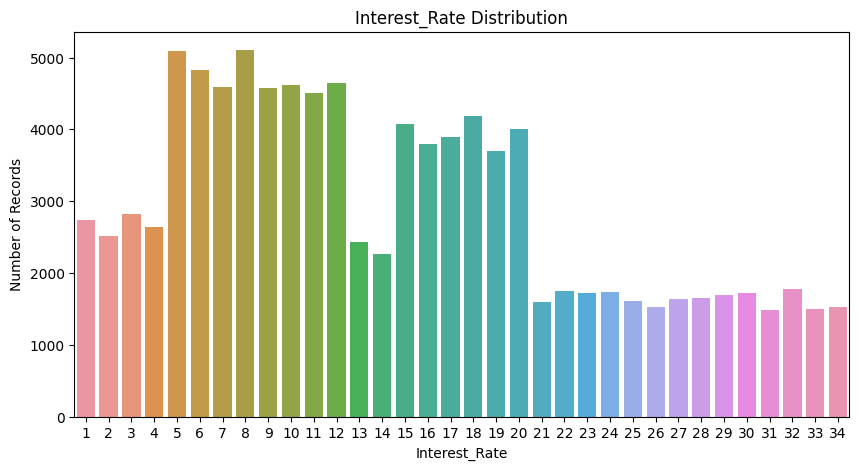

In [352]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x=df['Interest_Rate'])
plt.xlabel('Interest_Rate')
plt.ylabel('Number of Records')
plt.title('Interest_Rate Distribution')
plt.xticks(rotation=0)
plt.show()

**Summary**
- There were outliers present, after cleaning them up, interest rate ranges from 1% to 34%.

## **Column : Num_of_Loan**

In [353]:
df['Num_of_Loan'].unique()

array(['2', '1094', '4', '4_', '0', '0_', '3', '8', '-100', '8_', '1',
       '1_', '9', '7', '1222', '6', '5', '119', '3_', '6_', '2_', '9_',
       '143_', '7_', '5_', '1150', '351', '52', '95', '614', '504',
       '1241', '1496', '17', '966', '330', '290', '193', '520', '50',
       '1265', '352', '571', '190', '995', '55', '433', '590', '661',
       '313', '1027_', '92_', '1017', '904', '1132_', '1008', '49', '737',
       '546', '1096', '1461', '548', '939', '243', '1014', '924', '526',
       '1447', '1228', '1129', '968', '285', '1484', '716', '1236', '801',
       '809', '137', '208', '875', '1187', '621', '350', '911', '1023',
       '855', '802', '967', '1296', '640', '1131_', '639', '1365', '254',
       '1040', '141', '349', '659', '1480', '1259', '889', '70', '344',
       '898', '41', '1412', '1353', '720', '1154', '295', '238', '100',
       '54', '237', '868', '1214', '873', '33', '895', '1482', '1384',
       '182', '1289', '439', '563', '31', '597', '649', '1053', '

In [354]:
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_', '')
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('-', '')
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)

In [355]:
df['Num_of_Loan'].value_counts()

3      15104
2      15032
4      14743
0      10930
1      10606
       ...  
860        1
510        1
438        1
571        1
472        1
Name: Num_of_Loan, Length: 413, dtype: int64

In [356]:
grouped_modes = df.groupby('Customer_ID')['Num_of_Loan'].apply(lambda x: x.mode().iloc[0])
df['Num_of_Loan'] = df.apply(lambda row: grouped_modes[row['Customer_ID']] if row['Num_of_Loan'] != grouped_modes[row['Customer_ID']] else row['Num_of_Loan'], axis=1)

In [357]:
df['Num_of_Loan'].value_counts()

3    15752
2    15712
4    15456
0    11408
1    11128
6     8144
7     7680
5     7528
9     3856
8     3336
Name: Num_of_Loan, dtype: int64

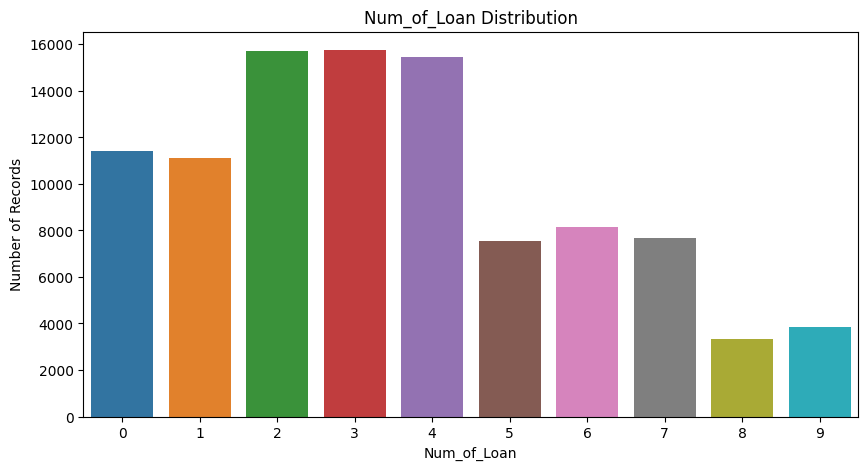

In [358]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x=df['Num_of_Loan'])
plt.xlabel('Num_of_Loan')
plt.ylabel('Number of Records')
plt.title('Num_of_Loan Distribution')
plt.xticks(rotation=0)
plt.show()

## **Column : Type_of_Loan**

In [359]:
df['Type_of_Loan'].unique()

array(['Credit-Builder Loan, and Home Equity Loan',
       'Not Specified, Home Equity Loan, Credit-Builder Loan, and Payday Loan',
       nan, ...,
       'Not Specified, Student Loan, Student Loan, Credit-Builder Loan, and Auto Loan',
       'Credit-Builder Loan, Payday Loan, Not Specified, Student Loan, Student Loan, Home Equity Loan, Home Equity Loan, and Home Equity Loan',
       'Auto Loan, Payday Loan, Payday Loan, Mortgage Loan, Payday Loan, and Home Equity Loan'],
      dtype=object)

In [360]:
df['Type_of_Loan'].isna().sum()

11408

In [361]:
filtered_df = df[pd.isna(df['Type_of_Loan'])]
filtered_df[['Customer_ID','Num_of_Loan','Num_Credit_Card','Type_of_Loan']]

,Customer_ID,Num_of_Loan,Num_Credit_Card,Type_of_Loan
16,CUS_0x100b,0,4,NaN
17,CUS_0x100b,0,4,NaN
18,CUS_0x100b,0,4,NaN
19,CUS_0x100b,0,4,NaN
20,CUS_0x100b,0,4,NaN
...,...,...,...,...
99947,CUS_0xfe5,0,4,NaN
99948,CUS_0xfe5,0,4,NaN
99949,CUS_0xfe5,0,4,NaN
99950,CUS_0xfe5,0,4,NaN


In [362]:
df.loc[(df['Num_of_Loan'] == 0) & (df['Num_Credit_Card'] > 0), 'Type_of_Loan'] = df['Type_of_Loan'].fillna('Not Specified')

In [363]:
df.loc[(df['Num_of_Loan'] == 0) & (df['Num_Credit_Card'] == 0) & (df['Total_EMI_per_month'] == 0), 'Type_of_Loan'] = 'Not Specified'

In [364]:
loan_types = df['Type_of_Loan'].str.replace('and', ',').str.get_dummies(', ')

# Concatenate the new columns with the original DataFrame
df  = pd.concat([df, loan_types], axis=1)

### **Used One hot coding to convert these columns**

**We have 9 types of Loans**
- auto loan
- credit-builder loan
- debt consolidation loan
- home equity loan
- mortgage loan
- not specified
- payday loan
- personal loan
 -student loan

In [365]:
col_order = ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan','Auto Loan',
       'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan',
       'Mortgage Loan', 'Not Specified', 'Payday Loan', 'Personal Loan',
       'Student Loan','Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']
df=df[col_order]

In [366]:
df['Type_of_Loan'].isna().sum()

0

## **Column : Delay_from_due_date**

In [367]:
df['Delay_from_due_date'].unique()

array([64, 57, 62, 67, 10,  5,  8,  3, 14, 19,  9, 27, 29, 12, 16,  6, 24,
        0, -4, -5,  1, 15, 23, 28, 18, 13, 11, 25, 50, 47, 48, 46,  7,  2,
       -3,  4, 30, 21, 17, 20, 22, 35, 40, 26, 31, 58, 59, 63, 37, 42, 43,
       38, 55, 41, 36, 52, 54, 53, 49, -2, 44, 39, 61, 34, 33, -1, 45, 51,
       60, 66, 56, 32, 65])

In [368]:
df['Delay_from_due_date'].dtypes

dtype('int64')

<Figure size 1000x500 with 0 Axes>

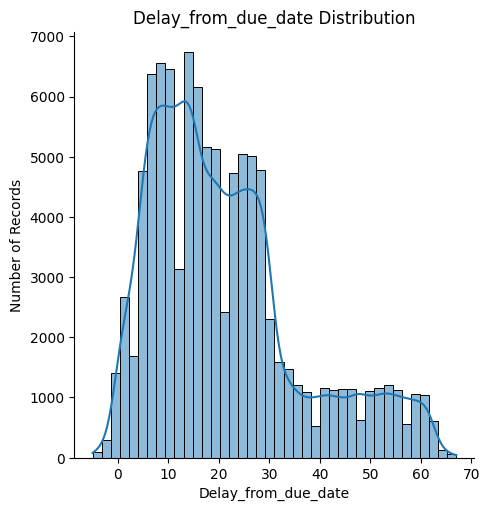

In [369]:
plt.figure(figsize=(10,5))
sns.displot(data=df, x=df['Delay_from_due_date'], kde= True, bins =40)
plt.xlabel('Delay_from_due_date')
plt.ylabel('Number of Records')
plt.title('Delay_from_due_date Distribution')
plt.xticks(rotation=0)
plt.show()

**Delay from due date ranges from -5 to 67 as the values can be before the due date and after the due date.**

## **Column : Num_of_Delayed_Payment**

In [370]:
df['Num_of_Delayed_Payment'].isna().sum()

7002

In [371]:
df['Num_of_Delayed_Payment'].unique()

array(['25', '26', '23', '28', '18', '16', '1749', '19', '7', '8', '9',
       '15', '13', nan, '12', '17_', '10', '20', '22', '1', '5', '2',
       '11', '17', '15_', '14', '3', '4', '6', '21', '8_', '11_', '0',
       '2230', '24', '18_', '-2', '19_', '1636', '20_', '-1', '16_',
       '921', '9_', '1766', '21_', '12_', '6_', '1_', '25_', '0_', '-3',
       '1572', '5_', '14_', '3_', '3162', '27', '1034', '4211', '4_',
       '2712', '1832', '22_', '3251', '7_', '867', '13_', '4106', '3951',
       '2216', '24_', '10_', '2_', '1640', '2142_', '754', '974', '1180',
       '1359', '320', '2250', '3621', '2438', '531', '3738', '2566',
       '719', '4326', '223', '1833', '3881', '23_', '439', '1614', '3495',
       '960', '4075', '3119', '4302', '121', '2081', '3894', '3484',
       '2594', '4126', '3944', '2553', '1820', '819', '27_', '3629',
       '2080', '1480', '2801', '359', '94', '473', '2072', '2604', '306',
       '1633', '4262', '2488', '2008', '2955', '1647', '1691', '468',
 

In [372]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_', '')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('-', '')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)

In [373]:
df['Num_of_Delayed_Payment'].value_counts().sort_values(ascending=True)

1668.0       1
2658.0       1
3458.0       1
439.0        1
531.0        1
          ... 
15.0      5237
10.0      5309
16.0      5312
17.0      5412
19.0      5481
Name: Num_of_Delayed_Payment, Length: 708, dtype: int64

In [374]:
df1 = df[pd.isna(df['Num_of_Delayed_Payment'])]
df1[['Customer_ID','Num_of_Loan','Num_Credit_Card','Num_of_Delayed_Payment']]

,Customer_ID,Num_of_Loan,Num_Credit_Card,Num_of_Delayed_Payment
26,CUS_0x1011,3,3,NaN
31,CUS_0x1011,3,3,NaN
33,CUS_0x1013,3,3,NaN
55,CUS_0x1018,8,7,NaN
66,CUS_0x102d,1,3,NaN
...,...,...,...,...
99935,CUS_0xfe3,4,5,NaN
99937,CUS_0xfe4,7,3,NaN
99942,CUS_0xfe4,7,3,NaN
99980,CUS_0xff6,2,6,NaN


In [375]:
grouped_modes = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].apply(lambda x: x.mode().iloc[0])
df['Num_of_Delayed_Payment'] = df.apply(lambda row: grouped_modes[row['Customer_ID']] if row['Num_of_Delayed_Payment'] != grouped_modes[row['Customer_ID']] else row['Num_of_Delayed_Payment'], axis=1)

In [376]:
df['Num_of_Delayed_Payment'].value_counts()

19.0    6392
10.0    6200
20.0    6184
16.0    6160
15.0    6032
8.0     5904
18.0    5760
17.0    5752
9.0     5744
12.0    5664
11.0    5368
14.0    3976
13.0    3752
1.0     2232
25.0    2208
5.0     2176
6.0     2160
21.0    2152
2.0     2136
23.0    2088
0.0     2056
22.0    2024
3.0     2000
7.0     1976
24.0    1968
4.0     1912
27.0       8
28.0       8
26.0       8
Name: Num_of_Delayed_Payment, dtype: int64

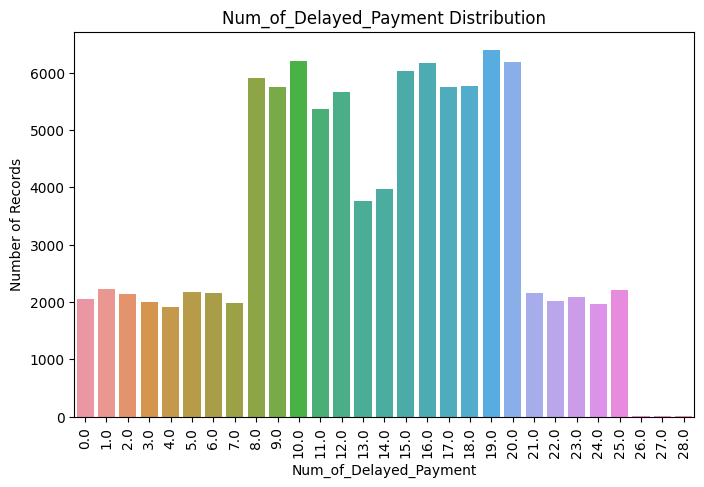

In [377]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x=df['Num_of_Delayed_Payment'])
plt.xlabel('Num_of_Delayed_Payment')
plt.ylabel('Number of Records')
plt.title('Num_of_Delayed_Payment Distribution')
plt.xticks(rotation=90)
plt.show()

In [378]:
df['Num_of_Delayed_Payment'].isna().sum()

0

## **Column : Changed_Credit_Limit**

In [379]:
df['Changed_Credit_Limit'].dtypes

dtype('O')

In [380]:
df['Changed_Credit_Limit'].value_counts()

_        2091
8.22      135
11.5      127
11.32     126
7.35      121
         ... 
-2.02       1
35.84       1
-4.88       1
-3.49       1
33.61       1
Name: Changed_Credit_Limit, Length: 3635, dtype: int64

In [381]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace('_', '')
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace('-', '')
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('', '0')
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)

In [382]:
grouped_modes = df.groupby('Customer_ID')['Changed_Credit_Limit'].apply(lambda x: x.mode().iloc[0])
df['Changed_Credit_Limit'] = df.apply(lambda row: grouped_modes[row['Customer_ID']] if row['Changed_Credit_Limit'] != grouped_modes[row['Customer_ID']] else row['Changed_Credit_Limit'], axis=1)

In [383]:
df['Changed_Credit_Limit'].value_counts()

8.22     152
11.50    152
11.32    144
7.69     136
7.35     136
        ... 
21.87      8
29.90      8
26.06      8
29.14      8
23.16      8
Name: Changed_Credit_Limit, Length: 2521, dtype: int64

<Figure size 800x500 with 0 Axes>

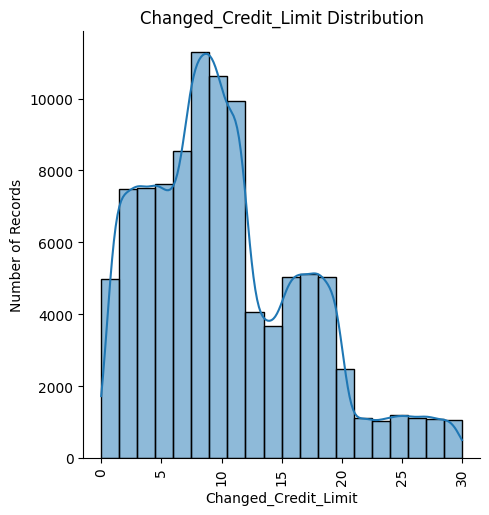

In [384]:
plt.figure(figsize=(8,5))
sns.displot(data=df, x=df['Changed_Credit_Limit'], kde=True, bins=20)
plt.xlabel('Changed_Credit_Limit')
plt.ylabel('Number of Records')
plt.title('Changed_Credit_Limit Distribution')
plt.xticks(rotation=90)
plt.show()

## **Column : Num_Credit_inquiries**

In [385]:
df['Num_Credit_Inquiries'].isna().sum()

1965

In [386]:
df['Num_Credit_Inquiries'].value_counts()

4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
253.0         1
2352.0        1
2261.0        1
519.0         1
1801.0        1
Name: Num_Credit_Inquiries, Length: 1223, dtype: int64

In [387]:
df2 = df[pd.isna(df['Num_Credit_Inquiries'])]
df2[['Customer_ID','Num_of_Loan','Num_Credit_Card','Num_Credit_Inquiries']]

,Customer_ID,Num_of_Loan,Num_Credit_Card,Num_Credit_Inquiries
55,CUS_0x1018,8,7,NaN
118,CUS_0x1041,9,8,NaN
161,CUS_0x1051,1,5,NaN
190,CUS_0x105b,0,4,NaN
235,CUS_0x107c,6,10,NaN
...,...,...,...,...
99847,CUS_0xfb4,4,6,NaN
99968,CUS_0xff4,5,7,NaN
99970,CUS_0xff4,5,7,NaN
99979,CUS_0xff6,2,6,NaN


In [388]:
grouped_modes = df.groupby('Customer_ID')['Num_Credit_Inquiries'].apply(lambda x: x.mode().iloc[0])
df['Num_Credit_Inquiries'] = df.apply(lambda row: grouped_modes[row['Customer_ID']] if row['Num_Credit_Inquiries'] != grouped_modes[row['Customer_ID']] else row['Num_Credit_Inquiries'], axis=1)

In [389]:
df['Num_Credit_Inquiries'].value_counts()

4.0     11936
3.0      9416
2.0      8568
7.0      8416
6.0      8264
8.0      8152
1.0      8104
0.0      7504
5.0      5728
9.0      5304
11.0     5280
10.0     5016
12.0     4592
13.0     1344
14.0      960
15.0      728
16.0      416
17.0      272
Name: Num_Credit_Inquiries, dtype: int64

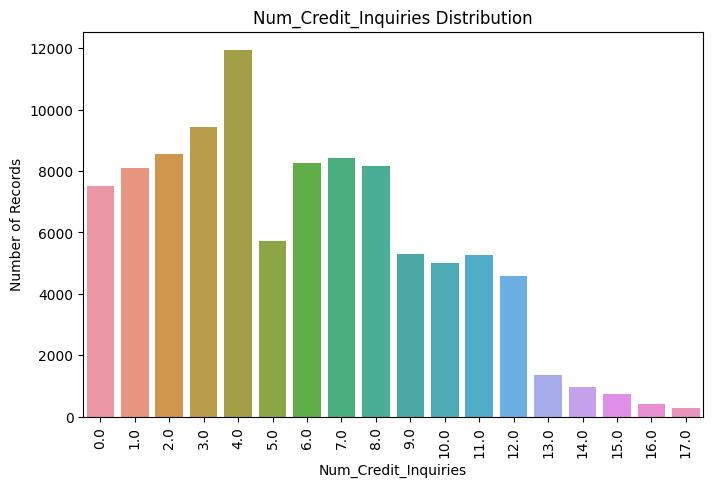

In [390]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x=df['Num_Credit_Inquiries'])
plt.xlabel('Num_Credit_Inquiries')
plt.ylabel('Number of Records')
plt.title('Num_Credit_Inquiries Distribution')
plt.xticks(rotation=90)
plt.show()

In [391]:
df['Num_Credit_Inquiries'].isna().sum()

0

## **Column : Credit_mix**

In [392]:
df['Credit_Mix'].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [393]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)

In [394]:
df.sort_values(by=['Customer_ID', 'Month'], inplace=True)
df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].fillna(method='ffill').fillna(method='bfill')

In [395]:
df['Credit_Mix'].value_counts()

Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

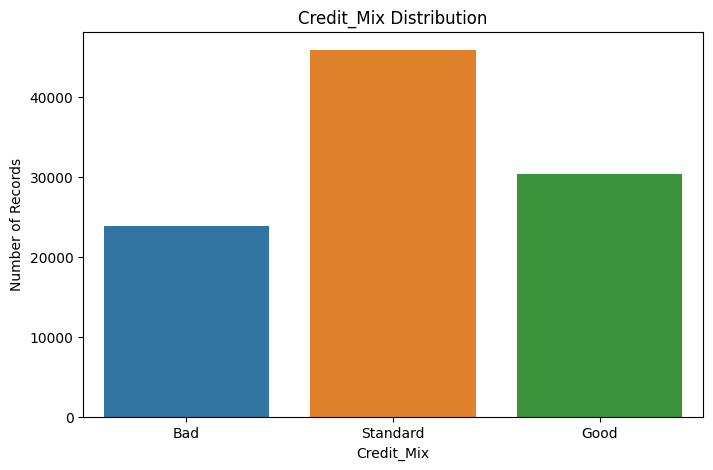

In [396]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x=df['Credit_Mix'])
plt.xlabel('Credit_Mix')
plt.ylabel('Number of Records')
plt.title('Credit_Mix Distribution')
plt.xticks(rotation=0)
plt.show()

**Summary**

 - There are 3 types of Credit Mix - Standard, Good, Bad
 - About 20k records of Credit Mix is marked as a garbage value (_).

## **Column : Outstanding Debt**

In [397]:
df['Outstanding_Debt'].value_counts()

1360.45     24
460.46      23
1151.7      23
1109.03     23
100.3       16
            ..
3530.13_     1
1181.44_     1
4078.71_     1
2362.56_     1
1799.87_     1
Name: Outstanding_Debt, Length: 13178, dtype: int64

In [398]:
df[['Customer_ID', 'Outstanding_Debt']]

,Customer_ID,Outstanding_Debt
0,CUS_0x1000,1562.91
1,CUS_0x1000,1562.91
2,CUS_0x1000,1562.91
3,CUS_0x1000,1562.91
4,CUS_0x1000,1562.91
...,...,...
99995,CUS_0xffd,1701.88
99996,CUS_0xffd,1701.88
99997,CUS_0xffd,1701.88
99998,CUS_0xffd,1701.88


In [399]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '')
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

<Figure size 800x500 with 0 Axes>

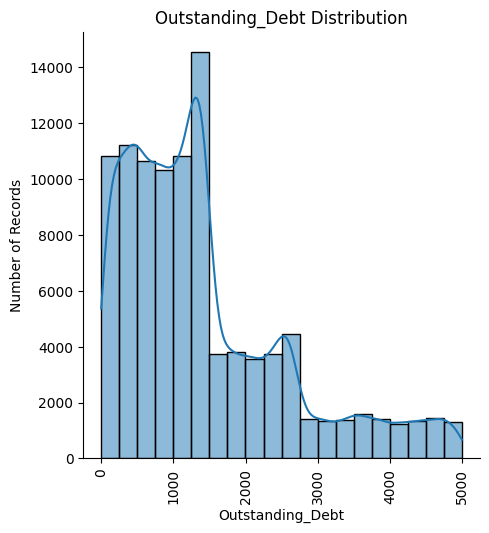

In [400]:
plt.figure(figsize=(8,5))
sns.displot(data=df, x=df['Outstanding_Debt'], kde=True, bins=20)
plt.xlabel('Outstanding_Debt')
plt.ylabel('Number of Records')
plt.title('Outstanding_Debt Distribution')
plt.xticks(rotation=90)
plt.show()

## **Column : Credit Utilization Ratio**

In [401]:
df['Credit_Utilization_Ratio'] =df['Credit_Utilization_Ratio'].round(2)

In [402]:
df['Credit_Utilization_Ratio']

0        32.84
1        30.08
2        29.44
3        26.61
4        38.15
         ...  
99995    29.51
99996    33.92
99997    36.97
99998    25.18
99999    26.17
Name: Credit_Utilization_Ratio, Length: 100000, dtype: float64

<Figure size 800x500 with 0 Axes>

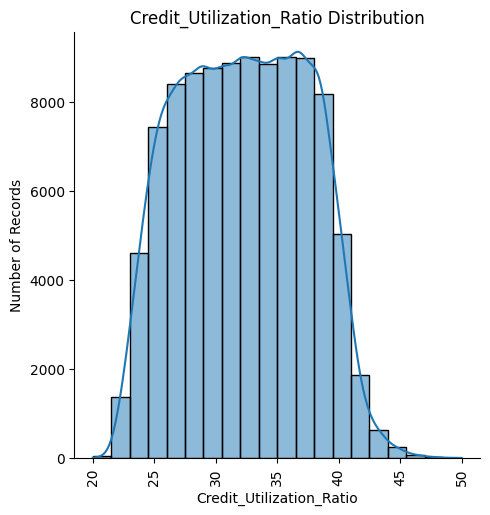

In [403]:
plt.figure(figsize=(8,5))
sns.displot(data=df, x=df['Credit_Utilization_Ratio'], kde=True, bins=20)
plt.xlabel('Credit_Utilization_Ratio')
plt.ylabel('Number of Records')
plt.title('Credit_Utilization_Ratio Distribution')
plt.xticks(rotation=90)
plt.show()

## **Column : Credit_history_Age**

In [404]:
df['Credit_History_Age'].isna().sum()

9030

In [405]:
df['Credit_History_Age'].value_counts()

15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: Credit_History_Age, Length: 404, dtype: int64

In [406]:
grouped_modes = df.groupby('Customer_ID')['Credit_History_Age'].apply(lambda x: x.mode().iloc[0])
df['Credit_History_Age'] = df.apply(lambda row: grouped_modes[row['Customer_ID']] if row['Credit_History_Age'] != grouped_modes[row['Customer_ID']] else row['Credit_History_Age'], axis=1)

In [407]:
df['Credit_History_Age'].isna().sum()

0

In [408]:
df1 = pd.DataFrame(df['Credit_History_Age'])

def convert_to_months(age_str):
    parts = age_str.split()
    years = int(parts[0])
    months = int(parts[3])
    total_months = years * 12 + months
    return total_months

df['Credit_History_Age_Num'] = df['Credit_History_Age'].apply(lambda x: convert_to_months(x))

In [409]:
df[['Credit_History_Age','Credit_History_Age_Num']]

,Credit_History_Age,Credit_History_Age_Num
0,10 Years and 2 Months,122
1,10 Years and 2 Months,122
2,10 Years and 2 Months,122
3,10 Years and 2 Months,122
4,10 Years and 2 Months,122
...,...,...
99995,18 Years and 2 Months,218
99996,18 Years and 2 Months,218
99997,18 Years and 2 Months,218
99998,18 Years and 2 Months,218


In [457]:
print(df['Credit_History_Age_Num'].min(), df['Credit_History_Age_Num'].max())

1 397


<Figure size 800x500 with 0 Axes>

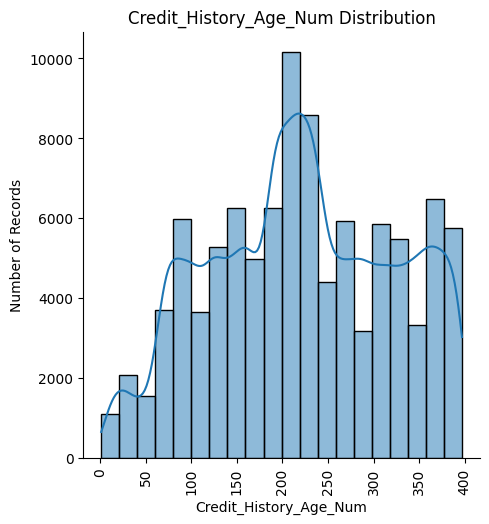

In [410]:
plt.figure(figsize=(8,5))
sns.displot(data=df, x=df['Credit_History_Age_Num'], kde=True, bins=20)
plt.xlabel('Credit_History_Age_Num')
plt.ylabel('Number of Records')
plt.title('Credit_History_Age_Num Distribution')
plt.xticks(rotation=90)
plt.show()

**We have converted credit history age into months as previous format was object datatype plus they were not in analytic form.**

## **Column : Payment_of_min_Amount**

In [411]:
df['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

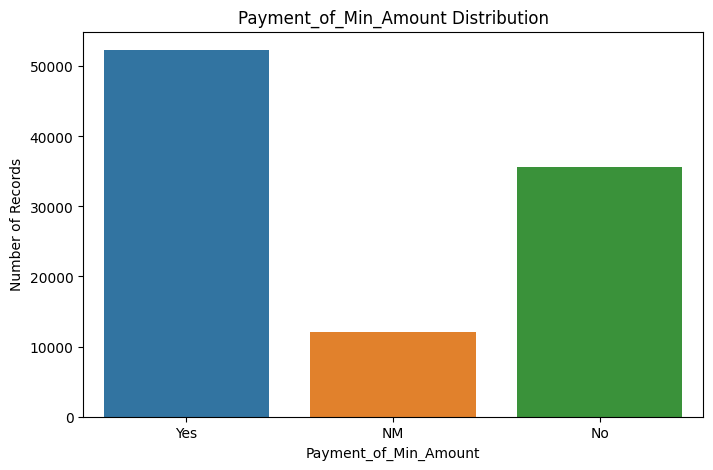

In [412]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x=df['Payment_of_Min_Amount'])
plt.xlabel('Payment_of_Min_Amount')
plt.ylabel('Number of Records')
plt.title('Payment_of_Min_Amount Distribution')
plt.xticks(rotation=0)
plt.show()

## **Column : Total_EMI_per_month**

In [413]:
df['Total_EMI_per_month'].value_counts()

0.000000        10613
42.941090           8
72.798279           8
119.461755          8
263.655491          8
                ...  
39156.000000        1
26128.000000        1
75532.000000        1
78386.000000        1
22380.000000        1
Name: Total_EMI_per_month, Length: 14950, dtype: int64

In [414]:
grouped_modes = df.groupby('Customer_ID')['Total_EMI_per_month'].apply(lambda x: x.mode().iloc[0])
df['Total_EMI_per_month'] = df.apply(lambda row: grouped_modes[row['Customer_ID']] if row['Total_EMI_per_month'] != grouped_modes[row['Customer_ID']] else row['Total_EMI_per_month'], axis=1)

In [415]:
print(df['Total_EMI_per_month'].min(),df['Total_EMI_per_month'].max())

0.0 1779.103254


In [416]:
df['Total_EMI_per_month'].value_counts()

0.000000      11072
42.941090         8
107.489365        8
78.047064         8
230.815449        8
              ...  
341.841495        8
400.386423        8
85.356930         8
61.845295         8
182.976650        8
Name: Total_EMI_per_month, Length: 11117, dtype: int64

<Figure size 800x500 with 0 Axes>

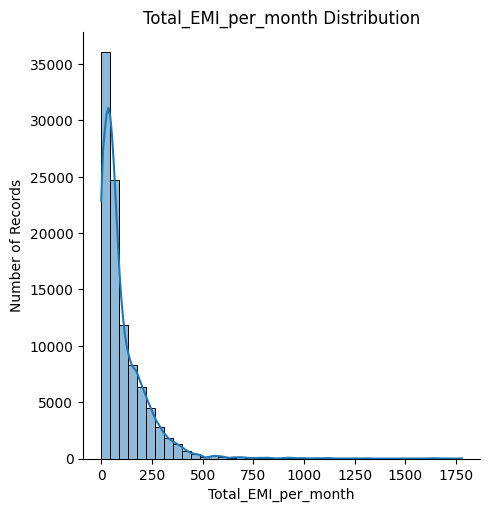

In [417]:
plt.figure(figsize=(8,5))
sns.displot(data=df, x=df['Total_EMI_per_month'], kde=True, bins=40)
plt.xlabel('Total_EMI_per_month')
plt.ylabel('Number of Records')
plt.title('Total_EMI_per_month Distribution')
plt.xticks(rotation=0)
plt.show()

## **Column : Amount_invested_monthly**

In [418]:
df['Amount_invested_monthly'].isna().sum()

4479

In [419]:
df['Amount_invested_monthly'].dtypes

dtype('O')

In [420]:
df['Amount_invested_monthly'].value_counts()

__10000__      4305
0               169
87.90990881       1
459.5317247       1
752.475627        1
               ... 
105.7266479       1
138.9942681       1
289.9612607       1
76.53803865       1
104.6294735       1
Name: Amount_invested_monthly, Length: 91049, dtype: int64

In [421]:
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace(0, np.nan)
df['Amount_invested_monthly']

0         87.909909
1         77.314276
2        176.132567
3        244.750283
4        266.597160
            ...    
99995    195.529273
99996    257.989693
99997     47.007379
99998    336.130231
99999    104.629474
Name: Amount_invested_monthly, Length: 100000, dtype: float64

In [422]:
df[df['Amount_invested_monthly']==0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_Num


In [423]:
df['Amount_invested_monthly'].isna().sum()

8953

In [424]:
mean_per_customer = df.groupby('Customer_ID')['Amount_invested_monthly'].mean()
mask = df['Amount_invested_monthly'].isna()
df.loc[mask, 'Amount_invested_monthly'] = df.loc[mask, 'Customer_ID'].map(mean_per_customer)

<Figure size 800x500 with 0 Axes>

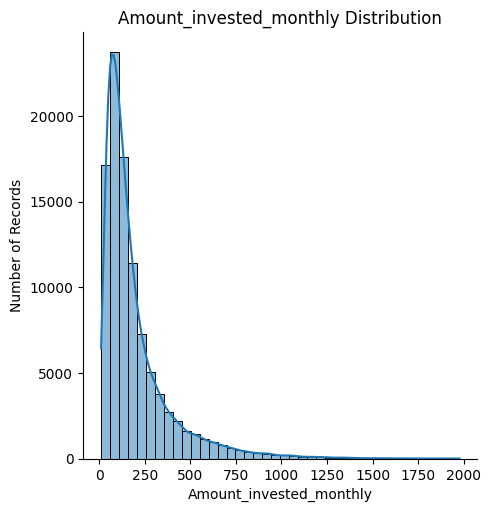

In [425]:
plt.figure(figsize=(8,5))
sns.displot(data=df, x=df['Amount_invested_monthly'], kde=True, bins=40)
plt.xlabel('Amount_invested_monthly')
plt.ylabel('Number of Records')
plt.title('Amount_invested_monthly Distribution')
plt.xticks(rotation=0)
plt.show()

In [426]:
df['Amount_invested_monthly'].isna().sum()

0

In [427]:
df['Amount_invested_monthly']= df['Amount_invested_monthly'].round(2)

## **Column : Payment_Behaviour**

In [428]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [429]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', np.nan)
df['Payment_Behaviour'] = df.groupby('Customer_ID')['Payment_Behaviour'].transform(lambda x: x.fillna(x.mode().iloc[0]))
print(df['Payment_Behaviour'].value_counts())

Low_spent_Small_value_payments      27767
High_spent_Medium_value_payments    19366
High_spent_Large_value_payments     15348
Low_spent_Medium_value_payments     14621
High_spent_Small_value_payments     11980
Low_spent_Large_value_payments      10918
Name: Payment_Behaviour, dtype: int64


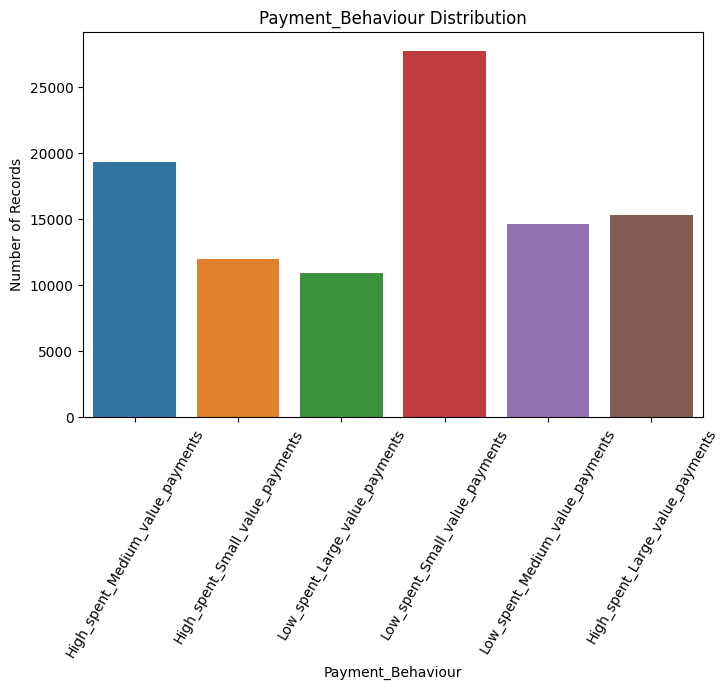

In [430]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x=df['Payment_Behaviour'])
plt.xlabel('Payment_Behaviour')
plt.ylabel('Number of Records')
plt.title('Payment_Behaviour Distribution')
plt.xticks(rotation=60)
plt.show()

## **Column : Monthly_Balance**

In [431]:
df['Monthly_Balance'].isna().sum()

1200

In [432]:
df['Monthly_Balance'].dtypes

dtype('O')

In [433]:
df['Monthly_Balance'].value_counts()

__-333333333333333333333333333__    9
350.0148691                         2
695.0571561                         2
419.7651674                         1
615.6677195                         1
                                   ..
259.3760946                         1
343.7619864                         1
288.6680278                         1
468.4784226                         1
337.380877                          1
Name: Monthly_Balance, Length: 98790, dtype: int64

In [434]:
df['Monthly_Balance'].nunique()

98790

In [435]:
df['Monthly_Balance'] = df['Monthly_Balance'].replace('__-333333333333333333333333333__', np.nan)
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df['Monthly_Balance'] = df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x: x.fillna(x.mean()))

In [436]:
df['Monthly_Balance'].value_counts()

261.565962    5
464.392372    4
238.332338    4
215.181452    4
164.119697    4
             ..
319.503931    1
345.075800    1
338.115057    1
344.112554    1
337.380877    1
Name: Monthly_Balance, Length: 99757, dtype: int64

<Figure size 800x500 with 0 Axes>

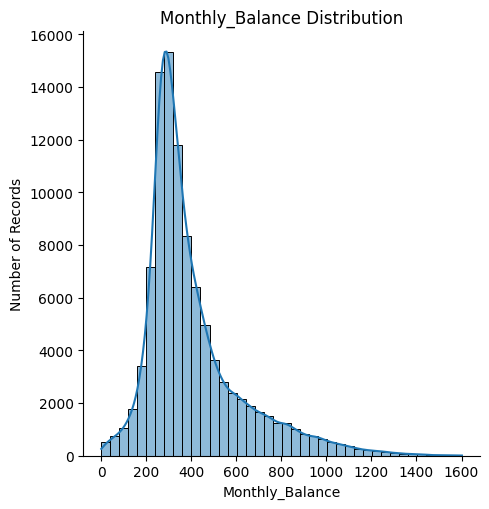

In [437]:
plt.figure(figsize=(8,5))
sns.displot(data=df, x=df['Monthly_Balance'], kde=True, bins=40)
plt.xlabel('Monthly_Balance')
plt.ylabel('Number of Records')
plt.title('Monthly_Balance Distribution')
plt.xticks(rotation=0)
plt.show()

In [438]:
df['Monthly_Balance'].isna().sum()

0

### **HEATMAP For checking correlation**

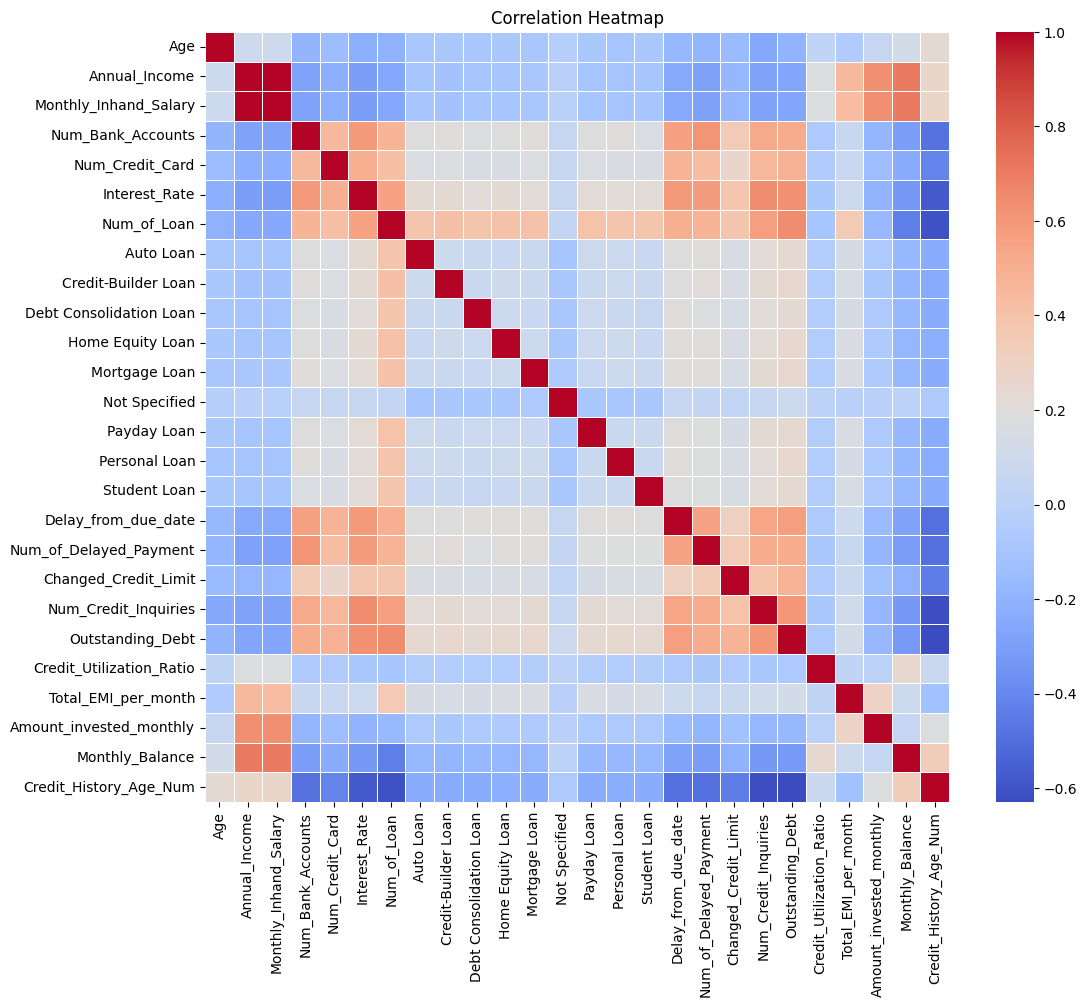

In [444]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### **Summary**
 - Strong Psoitive Correlation can seen among features like annual_income, Monthly_inhand_salary, Monthly Balance and amount invested Monthly.

 - Positive Correlation can be found among features like Num_Credit_inquiries, outstanding debt, Num_of_delayed_payment, Num_Bank_Account.

 - Strong negative correlation can be found among Credit_history_age, outstanding debt, Num_of _loan, interest rate.

In [445]:
columns_to_drop = ['Credit_History_Age', 'Type_of_Loan']
df.drop(columns=columns_to_drop, inplace=True)

In [446]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,33.274590,10.764414,14.000000,24.000000,33.000000,42.000000,56.000000
Annual_Income,100000.0,50505.123449,38299.422093,7005.930000,19342.972500,36999.705000,71683.470000,179987.280000
Monthly_Inhand_Salary,100000.0,4198.262107,3187.363227,303.645417,1626.594167,3096.066250,5957.715000,15204.633330
Num_Bank_Accounts,100000.0,5.411840,2.508237,1.000000,3.000000,5.000000,7.000000,10.000000
Num_Credit_Card,100000.0,5.532720,2.067504,0.000000,4.000000,5.000000,7.000000,11.000000
Interest_Rate,100000.0,14.532080,8.741330,1.000000,7.000000,13.000000,20.000000,34.000000
Num_of_Loan,100000.0,3.532880,2.446356,0.000000,2.000000,3.000000,5.000000,9.000000
Auto Loan,100000.0,0.305600,0.460663,0.000000,0.000000,0.000000,1.000000,1.000000
Credit-Builder Loan,100000.0,0.317280,0.465420,0.000000,0.000000,0.000000,1.000000,1.000000
Debt Consolidation Loan,100000.0,0.310400,0.462660,0.000000,0.000000,0.000000,1.000000,1.000000


In [447]:
df.describe(include='object').T

,count,unique,top,freq
ID,100000,100000,0x1628d,1
Customer_ID,100000,12500,CUS_0x1000,8
Month,100000,8,April,12500
Name,100000,10139,Jessicad,48
SSN,100000,12500,913-74-1218,8
Occupation,100000,15,Lawyer,7096
Credit_Mix,100000,3,Standard,45848
Payment_of_Min_Amount,100000,3,Yes,52326
Payment_Behaviour,100000,6,Low_spent_Small_value_payments,27767


## **LABEL ENCODING FEATURES**

In [448]:
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].replace({"Yes": 1, "No": 0, "NM": 0})

In [449]:
df["Credit_Mix"] = df["Credit_Mix"].replace({"Standard": 1, "Good": 2, "Bad": 0})

In [450]:
df["Payment_Behaviour"] = df["Payment_Behaviour"].replace({
      "Low_spent_Small_value_payments": 1,
      "High_spent_Medium_value_payments": 2,
      "Low_spent_Medium_value_payments": 3,
      "High_spent_Large_value_payments": 4,
      "High_spent_Small_value_payments": 5,
      "Low_spent_Large_value_payments": 6
  })

1. Low_spent_Small_value_payments: 1
2. High_spent_Small_value_payments: 2
3. Low_spent_Medium_value_payments: 3
4. High_spent_Medium_value_payments: 4
5. Low_spent_Large_value_payments: 5
6. High_spent_Large_value_payments: 6

This numeric representation captures the hierarchy where higher numbers represent higher spent value or larger payments.

## **FEATURE ENGINEERING**

In [451]:
df['Monthly_Debt_to_Income_Ratio'] = df['Outstanding_Debt'] / df['Monthly_Inhand_Salary']

In [452]:
df['Monthly_Debt_Repayment_Capacity'] = df['Monthly_Inhand_Salary'] - df['Total_EMI_per_month']

In [453]:
df["Payment_History_Score"] = (
      -1 * df["Delay_from_due_date"]
      -1 * df["Num_of_Delayed_Payment"]
      + 1 * df["Payment_of_Min_Amount"]
  )

# **CREDIT SCORE CALCULATION**

Selected features for credit score calulcation with their weights:
1. Payment history score
  - Weight: 0.30
  - Strongest predictor of future credit behavior.
2. Credit History Age in Months
  - Weight: 0.20
  - Longer credit history indicates responsible credit usage.Weighted moderately to reflect its significance.
3. Monthly Debt-to-Income Ratio (MDTIR)
  - Weight: 0.15
  - Lower ratio indicates better ability to manage debt.Weighted lower due to potential fluctuations in income.
4. Credit Utilization Ratio
  - Weight: 0.10
  - Lower ratio suggests responsible credit card usage.Weighted lower as it's a snapshot of current utilization.
5. Monthly Debt Repayment Capacity
  - Weight: 0.05
  - Reflects ability to manage existing debt.
6. Outstanding Debt
  - Weight: 0.05
  - Higher debt increases risk of default.
7. Num_Credit_Inquiries
  - Weight: 0.05
  - Fewer inquiries suggest lower credit-seeking behavior.
8. Payment Behaviour
  - Weight: 0.05
  - Insights into spending patterns and payment tendencies.
9. Credit Mix
  - Weight: 0.05
  - Taking different types of credit

In [454]:
def calculate_credit_score(data):

  # Group by Customer ID, handling month-level data and calculating scores
  grouped_data = data.groupby("Customer_ID").agg(
      Payment_History_Score=("Payment_History_Score", "mean"),
      Credit_History_Age_Num=("Credit_History_Age_Num", "max"),  # Use maximum history age
      Monthly_Debt_to_Income_Ratio=("Monthly_Debt_to_Income_Ratio", "mean"),
      Credit_Utilization_Ratio=("Credit_Utilization_Ratio", "mean"),
      Monthly_Debt_Repayment_Capacity=("Monthly_Debt_Repayment_Capacity",'mean'),
      Outstanding_Debt=("Outstanding_Debt", "mean"),
      Num_Credit_Inquiries=("Num_Credit_Inquiries", "sum"),
      Payment_Behaviour=("Payment_Behaviour","mean"),# Use average payment behaviour encoding
      Credit_Mix=("Credit_Mix","mean")
  )

    # Standardize values for numerical features
  grouped_data = (grouped_data - grouped_data.mean()) / grouped_data.std()

  # Calculate weighted scores
  grouped_data["credit_score"] = (
      0.30 * grouped_data["Payment_History_Score"]
      + 0.20 * grouped_data["Credit_History_Age_Num"]
      + 0.15 * (1-grouped_data["Monthly_Debt_to_Income_Ratio"]) #Inverse relation as lower the value better the financials
      + 0.10 * (1-grouped_data["Credit_Utilization_Ratio"]) #inverse relation
      + 0.05 * grouped_data["Monthly_Debt_Repayment_Capacity"]
      + 0.05 * grouped_data["Outstanding_Debt"]
      + 0.05 * (1-grouped_data["Num_Credit_Inquiries"]) #Inverse relation
      + 0.05 * grouped_data["Payment_Behaviour"]
      + 0.05 * grouped_data["Credit_Mix"]
  )

  # Normalize scores to a range of 0 to 100
  grouped_data["credit_score"] = (grouped_data["credit_score"] - grouped_data["credit_score"].min()) / (grouped_data["credit_score"].max() - grouped_data["credit_score"].min()) * 100
  # Map scores to the original FICO scale (300 to 850)
  min_range, max_range = 300, 850
  grouped_data["credit_score"] = (grouped_data["credit_score"] * (max_range - min_range) / 100) + min_range

  return grouped_data.reset_index()


# Calculate scores for all customers
credit_scores_df = calculate_credit_score(df)
credit_scores_df[["Customer_ID","credit_score"]]

,Customer_ID,credit_score
0,CUS_0x1000,495.215414
1,CUS_0x1009,765.188490
2,CUS_0x100b,725.966507
3,CUS_0x1011,678.701861
4,CUS_0x1013,731.596559
...,...,...
12495,CUS_0xff3,682.252337
12496,CUS_0xff4,687.775950
12497,CUS_0xff6,799.658279
12498,CUS_0xffc,561.434848


In [455]:
max_value=credit_scores_df['credit_score'].max()
credit_scores_df[credit_scores_df['credit_score'] == max_value]

,Customer_ID,Payment_History_Score,Credit_History_Age_Num,Monthly_Debt_to_Income_Ratio,Credit_Utilization_Ratio,Monthly_Debt_Repayment_Capacity,Outstanding_Debt,Num_Credit_Inquiries,Payment_Behaviour,Credit_Mix,credit_score
5701,CUS_0x65bf,1.45596,1.745692,-0.617335,-0.53696,2.484007,-0.796567,-1.222183,1.033527,1.27412,850.0


In [456]:
min_value=credit_scores_df['credit_score'].min()
credit_scores_df[credit_scores_df['credit_score'] == min_value]

,Customer_ID,Payment_History_Score,Credit_History_Age_Num,Monthly_Debt_to_Income_Ratio,Credit_Utilization_Ratio,Monthly_Debt_Repayment_Capacity,Outstanding_Debt,Num_Credit_Inquiries,Payment_Behaviour,Credit_Mix,credit_score
8310,CUS_0x8c6f,-1.830869,-1.507828,10.03639,-0.798419,-1.22304,1.971018,2.696945,-1.124135,-1.454655,300.0


## **Insights**

1. We have record of 12500 unique customers
2. In the dataset, we have data for each customer over the course of 8 months(from January to August)
3. We have following types of loans
  - auto loan
  - credit-builder loan
  - debt consolidation loan
  - home equity loan
  - mortgage loan
  - not specified
  - payday loan
  - personal loan
  - student loan
4. Most customers have a low Annual income and Distribution is right skewed.
5. Most customers have a low monthly income. Distribution is right skewed.
6. Majority of customers has no. of bank accounts between 3 to 8.
7. Number of credit cards range from 0 to 11 with most of the customers having credit cards in the range of 3 to 7 with peak at 5.
8. Interest rate ranges from 1% to 34%.
9. Very few customers invest greater than 2k amount per month.
10. Customers typically take anywhere from 2 to 4 loans, with the maximum number being 9.
11. Typically, most customers belong to the Low_spent_small_value_payments and High_spent_medium-value_payments.
12. Minimum Credit history is 1 month with highest as 397.

For credit score calculation we have used following features with their respective weights
- Selected features for credit score calulcation with their weights:
1. Payment histroy score: (Weight: 0.30)
2. Credit History Age in Months (Weight: 0.20)
3. Monthly Debt-to-Income Ratio (MDTIR) (Weight: 0.15)
4. Credit Utilization Ratio (Weight: 0.10)
5. Monthly Debt Repayment Capacity (Weight: 0.05)
6. Outstanding Debt (Weight: 0.05)
7. Num_Credit_Inquiries (Weight: 0.05)
8. Payment Behaviour (Weight: 0.05)
9. Credit_mix (Weight: 0.05)



## **Recommendations**

 - Engage with domain experts, such as credit analysts and financial professionals, to gain insights into the nuances of creditworthiness. Their expertise can guide the selection of features, model design, and interpretation of results, ultimately improving the reliability of the credit score.

 - Algorithms like random forests, gradient boosting, or neural networks may reveal hidden patterns and correlations within the data that traditional scoring models might overlook.

 - Consider expanding the set of features used for credit score calculation. This could involve incorporating alternative data sources such as social media behavior, rental payment history, or utility bill payments. Experimenting with new features can provide a more comprehensive and accurate representation of an individual's financial responsibility and creditworthiness.

 - The current credit score model uses a basic set of factors to calculate scores. To enhance reliability, we can delve into adjusting the importance of each factor through various weighting schemes. For example, we might assign more weight to factors that have a stronger impact on creditworthiness, such as payment history and credit utilization. This way, the model can better reflect the nuances of individual financial behavior.